# Explore here

In [1]:
pip install spotipy

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [13]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

client_id = 'ea8a22d106fb44faab1922517a2ae7de'
client_secret = '9e614b99e68f4eb994eb70b6c6d48da3'

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))


In [14]:
artist_name = 'Bad Bunny'
results = sp.search(q='artist:' + artist_name, type='artist')


artist_id = results['artists']['items'][0]['id']


top_tracks = sp.artist_top_tracks(artist_id, country='US')

In [15]:
import pandas as pd

songs_data = []
for track in top_tracks['tracks']:
    song = {
        'Nombre': track['name'],
        'Popularidad': track['popularity'],
        'Duración (minutos)': track['duration_ms'] / 60000
    }
    songs_data.append(song)

df = pd.DataFrame(songs_data)

In [16]:
top_3_popular_songs = df.sort_values(by='Popularidad', ascending=False).head(3)
print("Top 3 canciones más populares:")
print(top_3_popular_songs)

Top 3 canciones más populares:
            Nombre  Popularidad  Duración (minutos)
0      PERRO NEGRO           92            2.712783
1           MONACO           87            4.453233
3  Me Porto Bonito           86            2.976117


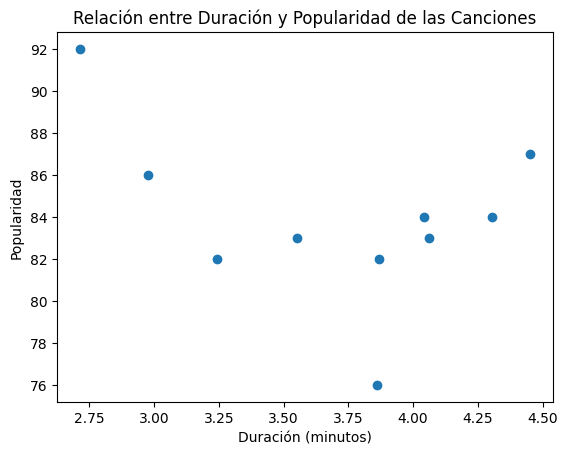

In [17]:
import matplotlib.pyplot as plt

plt.scatter(df['Duración (minutos)'], df['Popularidad'])
plt.xlabel('Duración (minutos)')
plt.ylabel('Popularidad')
plt.title('Relación entre Duración y Popularidad de las Canciones')
plt.show()